In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the sales and ingredient data
sales_df = pd.read_excel('/content/Pizza_Sale.xlsx')  # Historical sales data
ingredient_df = pd.read_excel('/content/Pizza_ingredients.xlsx')  # Ingredient requirements

# Display the first few rows of the datasets
print("Sales Data:")
print(sales_df.head())

print("\nIngredient Data:")
print(ingredient_df.head())



Sales Data:
   pizza_id  order_id  pizza_name_id  quantity           order_date  \
0         1         1     hawaiian_m         1  2015-01-01 00:00:00   
1         2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2         3         2  five_cheese_l         1  2015-01-01 00:00:00   
3         4         2    ital_supr_l         1  2015-01-01 00:00:00   
4         5         2     mexicana_m         1  2015-01-01 00:00:00   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppe

In [ ]:
import pandas as pd

# Assuming ingredient_df is already defined
# Get value counts for pizza_ingredients
ingredient_counts = ingredient_df['pizza_ingredients'].value_counts()

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

# Display the value counts
print(ingredient_counts)

# Reset the option if needed
pd.reset_option('display.max_rows')


pizza_ingredients
Garlic                        57
Tomatoes                      56
Red Onions                    41
Red Peppers                   30
Spinach                       24
Mushrooms                     21
Artichokes                    18
Pepperoni                     16
Mozzarella Cheese             15
Chicken                       15
Feta Cheese                   14
Green Olives                  12
Capocollo                     12
Kalamata Olives               11
Asiago Cheese                  9
Green Peppers                  9
Jalapeno Peppers               9
Pesto Sauce                    9
Cilantro                       6
Pineapple                      6
Zucchini                       6
Chipotle Sauce                 6
Sun-dried Tomatoes             6
Goat Cheese                    6
Fontina Cheese                 6
Corn                           6
Beef Chuck Roast               5
Bacon                          4
Prosciutto di San Daniele      3
Soppressata Salami       

In [ ]:
print(sales_df.duplicated().sum())
print(ingredient_df.duplicated().sum())

0
0


In [ ]:
print(sales_df.isnull().sum()/len(sales_df)*100)
print(ingredient_df.isnull().sum()/len(ingredient_df)*100)


pizza_id             0.000000
order_id             0.000000
pizza_name_id        0.032908
quantity             0.000000
order_date           0.000000
order_time           0.000000
unit_price           0.000000
total_price          0.014397
pizza_size           0.000000
pizza_category       0.047306
pizza_ingredients    0.026738
pizza_name           0.014397
dtype: float64
pizza_name_id         0.000000
pizza_name            0.000000
pizza_ingredients     0.000000
Items_Qty_In_Grams    0.772201
dtype: float64


In [ ]:
sales_df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48613.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821494
std,14035.529381,6180.119770,0.143077,3.621789,4.437520
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
ingredient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [ ]:
# Convert 'Date' column to datetime
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

In [ ]:
ingredient_df.head(50)

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
5,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecue Sauce,15.0
6,bbq_ckn_m,The Barbecue Chicken Pizza,Barbecued Chicken,30.0
7,bbq_ckn_m,The Barbecue Chicken Pizza,Red Peppers,10.0
8,bbq_ckn_m,The Barbecue Chicken Pizza,Green Peppers,15.0
9,bbq_ckn_m,The Barbecue Chicken Pizza,Tomatoes,20.0


In [ ]:
print(sales_df.shape)
print(ingredient_df.shape)


(48620, 12)
(518, 4)


In [ ]:
print(ingredient_df['Items_Qty_In_Grams'].unique())
print(sales_df.nunique())

[ 40.  15.  20.  30.  60.  10.   5. 150.  50.  nan  90.  45. 100. 120.
  25.  70.  80. 200.]
pizza_id             48620
order_id             21350
pizza_name_id           91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64


In [ ]:
ingredient_df.head(50)

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
5,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecue Sauce,15.0
6,bbq_ckn_m,The Barbecue Chicken Pizza,Barbecued Chicken,30.0
7,bbq_ckn_m,The Barbecue Chicken Pizza,Red Peppers,10.0
8,bbq_ckn_m,The Barbecue Chicken Pizza,Green Peppers,15.0
9,bbq_ckn_m,The Barbecue Chicken Pizza,Tomatoes,20.0


In [ ]:
ingredient_df.isnull().sum()/len(ingredient_df)*100

,0
pizza_name_id,0.000000
pizza_name,0.000000
pizza_ingredients,0.000000
Items_Qty_In_Grams,0.772201


In [ ]:
ingredient_df.columns

Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')

In [ ]:
# Ensure the column 'Items_Qty_In_Grams' is of type float64
ingredient_df['Items_Qty_In_Grams'] = ingredient_df['Items_Qty_In_Grams'].astype(float)

# Fill 'Sliced Ham' quantities based on pizza size
ingredient_df.loc[(ingredient_df['pizza_ingredients'] == 'Sliced Ham') & (ingredient_df['pizza_name_id'] == 'hawaiian_l'), 'Items_Qty_In_Grams'] = 40.0
ingredient_df.loc[(ingredient_df['pizza_ingredients'] == 'Sliced Ham') & (ingredient_df['pizza_name_id'] == 'hawaiian_m'), 'Items_Qty_In_Grams'] = 25.0
ingredient_df.loc[(ingredient_df['pizza_ingredients'] == 'Sliced Ham') & (ingredient_df['pizza_name_id'] == 'hawaiian_s'), 'Items_Qty_In_Grams'] = 15.0

# Fill missing values for 'Caramelized Onions' based on the 'pizza_ingredients' column
ingredient_df.loc[(ingredient_df['pizza_ingredients'] == 'Caramelized Onions') &
                  (ingredient_df['Items_Qty_In_Grams'].isna()), 'Items_Qty_In_Grams'] = 20.0




In [ ]:
ingredient_df.isnull().sum()/len(ingredient_df)*100

,0
pizza_name_id,0.0
pizza_name,0.0
pizza_ingredients,0.0
Items_Qty_In_Grams,0.0


In [ ]:
# Example: Interpolating missing values in 'unit_price' (assuming some are missing)
sales_df['unit_price'] = sales_df['unit_price'].interpolate(method='linear')

# Example: Interpolating missing values in 'total_price'
sales_df['total_price'] = sales_df['total_price'].interpolate(method='linear')

# Display the DataFrame after interpolation
print(sales_df.head(10))


   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   
5         6         2     thai_ckn_l         1 2015-01-01   11:57:40   
6         7         3    ital_supr_m         1 2015-01-01   12:12:28   
7         8         3   prsc_argla_l         1 2015-01-01   12:12:28   
8         9         4    ital_supr_m         1 2015-01-01   12:16:31   
9        10         5    ital_supr_m         1 2015-01-01   12:21:30   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L  

In [ ]:
sales_df.isnull().sum()/len(sales_df)*100

,0
pizza_id,0.000000
order_id,0.000000
pizza_name_id,0.032908
quantity,0.000000
order_date,0.000000
order_time,0.000000
unit_price,0.000000
total_price,0.000000
pizza_size,0.000000
pizza_category,0.047306


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48604 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48597 non-null  object        
 10  pizza_ingredients  48607 non-null  object        
 11  pizza_name         48613 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [ ]:
sales_df.drop(["pizza_id"],axis=1,inplace=True)

In [ ]:
sales_df.head(10)

,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,2,thai_ckn_l,1,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,3,ital_supr_m,1,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,3,prsc_argla_l,1,2015-01-01,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,4,ital_supr_m,1,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,5,ital_supr_m,1,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [ ]:
import pandas as pd
import numpy as np



# Create a reference DataFrame and generate pizza_name_id
reference_df = sales_df[['pizza_name', 'pizza_size']].drop_duplicates()
reference_df['pizza_name_id'] = reference_df['pizza_name'].str.replace('The ', '').str.replace(' Pizza', '').str.lower() + '_' + reference_df['pizza_size'].str.lower()

# Create a lookup dictionary
lookup_dict = dict(zip(zip(reference_df['pizza_name'], reference_df['pizza_size']), reference_df['pizza_name_id']))

# Fill missing pizza_name_id in the original DataFrame
sales_df['pizza_name_id'] = sales_df.apply(
    lambda row: lookup_dict.get((row['pizza_name'], row['pizza_size']))
    if pd.isna(row['pizza_name_id']) and pd.notna(row['pizza_name'])
    else row['pizza_name_id'],
    axis=1
)

print(sales_df["pizza_name_id"].isnull().sum())


0


In [ ]:
sales_df['pizza_name_id'] = sales_df['pizza_name_id'].replace('greek_s', 'the_greek_s')


In [ ]:
# Print the number of unique values for each column in the DataFrame
print(sales_df.nunique())


order_id             21350
pizza_name_id          100
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64


In [ ]:
sales_df["pizza_category"].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken', nan], dtype=object)

In [ ]:
import pandas as pd
import numpy as np


# Function to count ingredients
def count_ingredients(ingredients):
    if pd.isna(ingredients):
        return 0
    return len(ingredients.split(','))

# Fill 'pizza_category' based on various conditions using if-else logic
for index, row in sales_df.iterrows():
    ingredients = row['pizza_ingredients']
    category = row['pizza_category']

    if pd.notna(category):
        continue  # Skip rows where 'pizza_category' is already filled

    if count_ingredients(ingredients) <= 4:
        sales_df.at[index, 'pizza_category'] = 'Classic'
    elif 'chicken' in ingredients.lower():
        sales_df.at[index, 'pizza_category'] = 'Chicken'
    elif any(veg in ingredients.lower() for veg in ['spinach', 'mushroom', 'tomatoes']):
        sales_df.at[index, 'pizza_category'] = 'Veggie'
    elif 'prosciutto di san daniele' in ingredients.lower():
        sales_df.at[index, 'pizza_category'] = 'Supreme'

print(sales_df.isnull().sum())


order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        2
pizza_ingredients    13
pizza_name            7
dtype: int64


In [ ]:
# Display rows where 'pizza_category' is NaN
null_pizza_category_df = sales_df[sales_df['pizza_category'].isna()]

print(null_pizza_category_df)


     order_id  pizza_name_id  quantity order_date order_time  unit_price  \
427       182   brie_carre_s         1 2015-03-01   18:50:10       23.65   
516       221  five_cheese_l         1 2015-04-01   15:33:18       18.50   

     total_price pizza_size pizza_category  \
427        23.65          S            NaN   
516        18.50          L            NaN   

                                     pizza_ingredients             pizza_name  
427  Brie Carre Cheese, Prosciutto, Caramelized Oni...   The Brie Carre Pizza  
516  Mozzarella Cheese, Provolone Cheese, Smoked Go...  The Five Cheese Pizza  


In [ ]:
sales_df.isnull().sum()/len(sales_df)*100

,0
order_id,0.000000
pizza_name_id,0.000000
quantity,0.000000
order_date,0.000000
order_time,0.000000
unit_price,0.000000
total_price,0.000000
pizza_size,0.000000
pizza_category,0.004114
pizza_ingredients,0.026738


In [ ]:
import pandas as pd
import numpy as np


# Mapping of pizza_name to ingredients
ingredients_mapping = {
    'The Five Cheese Pizza': 'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic',
    'The Green Garden Pizza': 'Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese',
    'The Hawaiian Pizza': 'Sliced Ham, Pineapple, Mozzarella Cheese',
    'The Spinach and Feta Pizza': 'Spinach, Mushrooms, Red Onions, Feta Cheese, Garlic',
    'The Pepperoni, Mushroom, and Peppers Pizza': 'Pepperoni, Mushrooms, Green Peppers',
    'The California Chicken Pizza': 'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese',
    'The Four Cheese Pizza': 'Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic',
    'The Italian Vegetables Pizza': 'Eggplant, Artichokes, Tomatoes, Zucchini, Red Peppers, Garlic, Pesto Sauce',
    'The Southwest Chicken Pizza': 'Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce',
    'The Chicken Alfredo Pizza': 'Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce',
    'The Prosciutto and Arugula Pizza': 'Prosciutto di San Daniele, Arugula, Mozzarella Cheese'
}

# Fill 'pizza_ingredients' based on 'pizza_name' using the mapping
for pizza_name, ingredients in ingredients_mapping.items():
    sales_df.loc[sales_df['pizza_name'] == pizza_name, 'pizza_ingredients'] = ingredients

print(sales_df.isnull().sum())


order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       2
pizza_ingredients    0
pizza_name           7
dtype: int64


In [ ]:
# Display rows where 'pizza_category' is NaN
null_pizza_category_df = sales_df[sales_df['pizza_name'].isna()]

print(null_pizza_category_df)


     order_id pizza_name_id  quantity order_date order_time  unit_price  \
688       303   pepperoni_s         1 2015-05-01   20:02:51        9.75   
689       304    hawaiian_s         1 2015-05-01   20:07:58       10.50   
690       304    mexicana_l         1 2015-05-01   20:07:58       20.25   
691       305   pepperoni_l         1 2015-05-01   20:35:40       15.25   
692       305    sicilian_s         1 2015-05-01   20:35:40       12.25   
693       305  spicy_ital_m         1 2015-05-01   20:35:40       16.50   
694       306    big_meat_s         1 2015-05-01   20:37:40       12.00   

     total_price pizza_size pizza_category  \
688         9.75          S        Classic   
689        10.50          S        Classic   
690        20.25          L         Veggie   
691        15.25          L        Classic   
692        12.25          S        Supreme   
693        16.50          M        Supreme   
694        12.00          S        Classic   

                              

In [ ]:
import pandas as pd
import numpy as np



# Function to generate pizza_name from pizza_name_id
def generate_pizza_name(pizza_name_id):
    if pd.isna(pizza_name_id):
        return np.nan
    # Generate pizza_name from pizza_name_id
    pizza_name = f"The {pizza_name_id[:-2].replace('_', ' ').title()} Pizza"
    return pizza_name

# Apply the function to fill missing pizza_name
sales_df['pizza_name'] = sales_df['pizza_name_id'].apply(generate_pizza_name)

print(sales_df.isnull().sum())


order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       2
pizza_ingredients    0
pizza_name           0
dtype: int64


In [ ]:
sales_df["pizza_name"].unique()

array(['The Hawaiian Pizza', 'The Classic Dlx Pizza',
       'The Five Cheese Pizza', 'The Ital Supr Pizza',
       'The Mexicana Pizza', 'The Thai Ckn Pizza', 'The Prsc Argla Pizza',
       'The Bbq Ckn Pizza', 'The The Greek Pizza',
       'The Spinach Supr Pizza', 'The Green Garden Pizza',
       'The Ital Cpcllo Pizza', 'The Spicy Ital Pizza',
       'The Spin Pesto Pizza', 'The Veggie Veg Pizza',
       'The Southw Ckn Pizza', 'The Cali Ckn Pizza',
       'The Pepperoni Pizza', 'The Ckn Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Thai Chicken Pizza',
       'The Calabrese Pizza', 'The Ital Veggie Pizza',
       'The Mediterraneo Pizza', 'The Peppr Salami Pizza',
       'The Spinach Fet Pizza', 'The Sicilian Pizza',
       'The Ckn Alfredo Pizza', 'The Pep Msh Pep Pizza',
       'The The Greek  Pizza', 'The Spinach Supreme Pizza',
       'The Barbecue Chicken Pizza', 'The Italian Supreme Pizza',
  

In [ ]:
import pandas as pd
import numpy as np



# Replacement dictionary
replacement_dict = {
    'The Ital Supr Pizza': 'The Italian Supreme Pizza',
    'The Thai Ckn Pizza': 'The Thai Chicken Pizza',
    'The Bbq Ckn Pizza': 'The Barbecue Chicken Pizza',
    'The Ital Cpcllo Pizza': 'The Italian Capocollo Pizza',
    'The Spicy Ital Pizza': 'The Spicy Italian Pizza',
    'The The Greek Pizza': 'The Greek Pizza',
    'The Peppr Salami Pizza': 'The Pepper Salami Pizza',
    'The Prsc Argla Pizza': 'The Prosciutto and Arugula Pizza',
    'The Bbq Ckn Pizza': 'The Barbecue Chicken Pizza',
    'The Spinach Supr Pizza': 'The Spinach Supreme Pizza',
    "The Ckn Pesto Pizza": 'The Chicken Pesto Pizza',
    'The Ckn Alfredo Pizza': 'The Chicken Alfredo Pizza',
    'The The Greek  Pizza':'The Greek Pizza',
    'The The Greek X Pizza':'The Greek Pizza',
    'The Pep Msh Pep Pizza':'The Pepperoni Mushroom Peppers Pizza',
    'The Southw Ckn Pizza':'The Southwest Chicken Pizza',
    'The Cali Ckn Pizza': 'The California Chicken Pizza',
    'The Classic Dlx Pizza':'The Classic Deluxe Pizza' ,
    'The Ital Veggie Pizza': 'The Italian Vegetables Pizza',
    'The Spinach Fet Pizza':'The Spinach and Feta Pizza'




}

# Replace values in 'pizza_name' column
sales_df['pizza_name'] = sales_df['pizza_name'].replace(replacement_dict)

print(sales_df.isnull().sum())


order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       2
pizza_ingredients    0
pizza_name           0
dtype: int64


In [ ]:
# Convert the 'order_date' column to datetime format if not already
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], errors='coerce')

# Perform weekly aggregation by 'pizza_name' and sum the 'quantity' sold
weekly_sales = sales_df.groupby([pd.Grouper(key='order_date', freq='W'), 'pizza_name_id']).agg({'quantity': 'sum'}).reset_index()

# Display the result
print(weekly_sales.head(20))


   order_date  pizza_name_id  quantity
0  2015-01-04      bbq_ckn_l        12
1  2015-01-04      bbq_ckn_m        13
2  2015-01-04      bbq_ckn_s         2
3  2015-01-04     big_meat_s        20
4  2015-01-04   brie_carre_s         4
5  2015-01-04    calabrese_l         3
6  2015-01-04    calabrese_m         8
7  2015-01-04     cali_ckn_l         9
8  2015-01-04     cali_ckn_m        15
9  2015-01-04     cali_ckn_s         4
10 2015-01-04  ckn_alfredo_l         2
11 2015-01-04  ckn_alfredo_m         4
12 2015-01-04  ckn_alfredo_s         2
13 2015-01-04    ckn_pesto_l         6
14 2015-01-04    ckn_pesto_m         2
15 2015-01-04    ckn_pesto_s         1
16 2015-01-04  classic_dlx_l         6
17 2015-01-04  classic_dlx_m        18
18 2015-01-04  classic_dlx_s        11
19 2015-01-04  five cheese_l         1


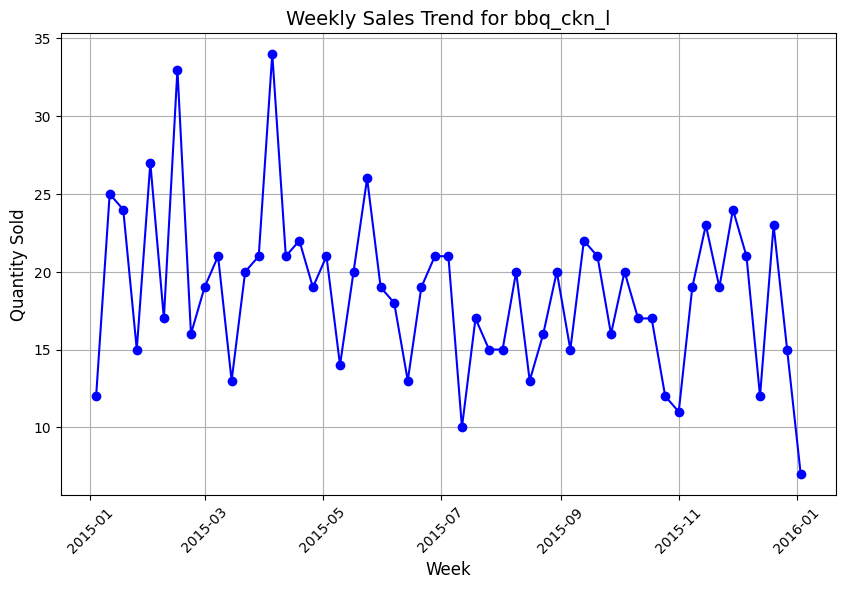

In [ ]:
import matplotlib.pyplot as plt

# Filter for the specific pizza, for example 'bbq_ckn_l'
pizza_name = 'bbq_ckn_l'
pizza_sales = weekly_sales[weekly_sales['pizza_name_id'] == pizza_name]

# Plotting the sales trend over time
plt.figure(figsize=(10, 6))
plt.plot(pizza_sales['order_date'], pizza_sales['quantity'], marker='o', color='b')

# Setting plot labels and title
plt.xlabel('Week', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.title(f'Weekly Sales Trend for {pizza_name}', fontsize=14)

# Display the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


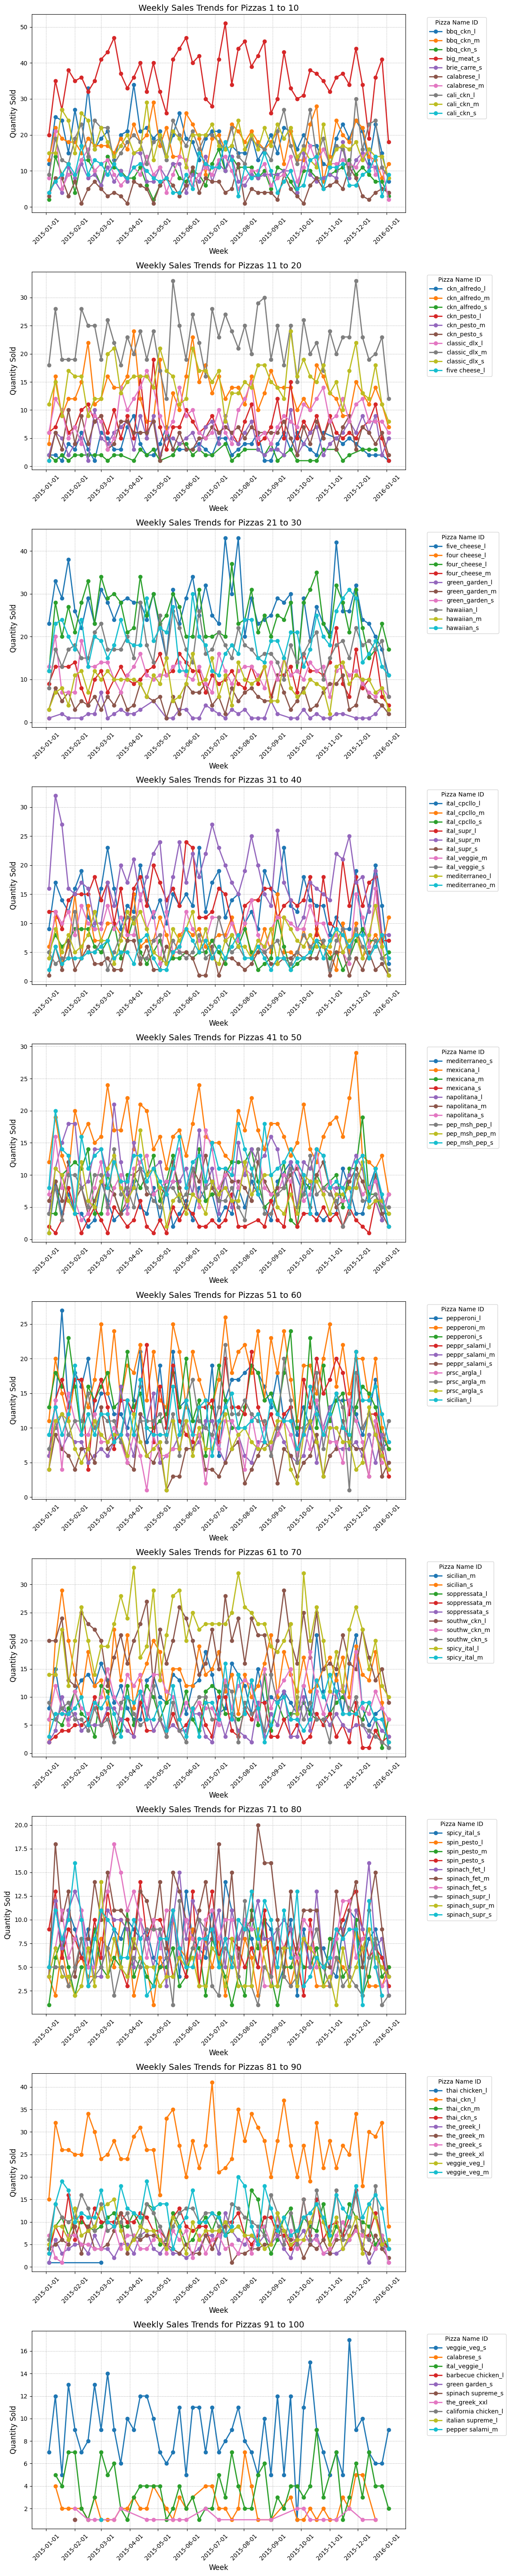

In [ ]:
import matplotlib.dates as mdates
import math

# Get unique pizza names from the weekly_sales DataFrame
unique_pizzas = weekly_sales['pizza_name_id'].unique()

# Set up the number of pizzas per subplot
pizzas_per_plot = 10

# Calculate the number of rows needed based on the number of pizzas
num_plots = math.ceil(len(unique_pizzas) / pizzas_per_plot)

# Create subplots with a grid layout
fig, axs = plt.subplots(num_plots, 1, figsize=(12, num_plots * 6))

# Flatten the axs array in case there's only one row of subplots
if num_plots == 1:
    axs = [axs]

# Loop through each subset of 10 pizzas and plot their sales trends in subplots
for i in range(num_plots):
    # Get the current subset of pizzas
    start_idx = i * pizzas_per_plot
    end_idx = start_idx + pizzas_per_plot
    pizza_subset = unique_pizzas[start_idx:end_idx]

    for pizza in pizza_subset:
        pizza_sales = weekly_sales[weekly_sales['pizza_name_id'] == pizza]
        axs[i].plot(pizza_sales['order_date'], pizza_sales['quantity'], marker='o', label=pizza, linewidth=2)

    # Adding labels and legend for each subplot
    axs[i].set_xlabel('Week', fontsize=12)
    axs[i].set_ylabel('Quantity Sold', fontsize=12)
    axs[i].set_title(f'Weekly Sales Trends for Pizzas {start_idx + 1} to {end_idx}', fontsize=14)

    # Format date axis for better readability
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].tick_params(axis='x', rotation=45)

    # Add grid and make the legend clear
    axs[i].legend(title='Pizza Name ID', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Load ingredient data
# ingredient_df = pd.read_csv('ingredient_data.csv')  # Example loading code

# Merge weekly sales data with ingredient data on 'pizza_name_id'
merged_df = pd.merge(weekly_sales, ingredient_df, on='pizza_name_id')

# Check the merged DataFrame columns
print(merged_df.columns)

# Compute total ingredients needed
if 'Items_Qty_In_Grams' in merged_df.columns:
    merged_df['Total Ingredient Quantity Needed'] = merged_df['quantity'] * merged_df['Items_Qty_In_Grams']
else:
    print("Column 'Items_Qty_In_Grams' not found.")

# Display the first few rows to verify the results
print(merged_df[['pizza_name_id', 'quantity', 'Items_Qty_In_Grams', 'Total Ingredient Quantity Needed']].head())


Index(['order_date', 'pizza_name_id', 'quantity', 'pizza_name',
       'pizza_ingredients', 'Items_Qty_In_Grams'],
      dtype='object')
  pizza_name_id  quantity  Items_Qty_In_Grams  \
0     bbq_ckn_l        12                40.0   
1     bbq_ckn_l        12                15.0   
2     bbq_ckn_l        12                20.0   
3     bbq_ckn_l        12                30.0   
4     bbq_ckn_l        12                60.0   

   Total Ingredient Quantity Needed  
0                             480.0  
1                             180.0  
2                             240.0  
3                             360.0  
4                             720.0  


In [ ]:
# Step 1: Load the ingredient data
# Assume 'ingredient_df' has columns: 'pizza_name_id', 'ingredient_name', 'Items_Qty_In_Grams'

# Step 2: Merge the weekly sales data with the ingredient data on 'pizza_name_id'
# 'weekly_sales' has columns: 'order_date', 'pizza_name_id', 'quantity'
# 'ingredient_df' has columns: 'pizza_name_id', 'ingredient_name', 'Items_Qty_In_Grams'

merged_df = pd.merge(weekly_sales, ingredient_df, on='pizza_name_id')

# Step 3: Compute the total ingredient quantity needed
# Multiply the quantity sold by the quantity of the ingredient needed per pizza
merged_df['total_ingredient_quantity_needed'] = merged_df['quantity'] * merged_df['Items_Qty_In_Grams']

# Step 4: Group by ingredient to get the total quantity required for each ingredient
total_ingredient_requirements = merged_df.groupby('pizza_ingredients')['total_ingredient_quantity_needed'].sum().reset_index()

# Rename the column to be more descriptive
total_ingredient_requirements.columns = ['pizza_ingredients', 'total_quantity_needed']

# Step 5: Display the total ingredients required
print(total_ingredient_requirements)


          pizza_ingredients  total_quantity_needed
0              ?duja Salami                41020.0
1             Alfredo Sauce                15265.0
2                 Anchovies                42515.0
3                Artichokes               126200.0
4                   Arugula                14625.0
..                      ...                    ...
59       Sun-dried Tomatoes                18845.0
60  Thai Sweet Chilli Sauce                56660.0
61                    Thyme                 2450.0
62                 Tomatoes               594170.0
63                 Zucchini                48620.0

[64 rows x 2 columns]


In [ ]:
merged_df.head(20)

,order_date,pizza_name_id,quantity,pizza_name,pizza_ingredients,Items_Qty_In_Grams,total_ingredient_quantity_needed
0,2015-01-04,bbq_ckn_l,12,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,480.0
1,2015-01-04,bbq_ckn_l,12,The Barbecue Chicken Pizza,Red Peppers,15.0,180.0
2,2015-01-04,bbq_ckn_l,12,The Barbecue Chicken Pizza,Green Peppers,20.0,240.0
3,2015-01-04,bbq_ckn_l,12,The Barbecue Chicken Pizza,Tomatoes,30.0,360.0
4,2015-01-04,bbq_ckn_l,12,The Barbecue Chicken Pizza,Red Onions,60.0,720.0
5,2015-01-04,bbq_ckn_l,12,The Barbecue Chicken Pizza,Barbecue Sauce,15.0,180.0
6,2015-01-11,bbq_ckn_l,25,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,1000.0
7,2015-01-11,bbq_ckn_l,25,The Barbecue Chicken Pizza,Red Peppers,15.0,375.0
8,2015-01-11,bbq_ckn_l,25,The Barbecue Chicken Pizza,Green Peppers,20.0,500.0
9,2015-01-11,bbq_ckn_l,25,The Barbecue Chicken Pizza,Tomatoes,30.0,750.0


In [ ]:
weekly_sales.head(20)

,order_date,pizza_name_id,quantity
0,2015-01-04,bbq_ckn_l,12
1,2015-01-04,bbq_ckn_m,13
2,2015-01-04,bbq_ckn_s,2
3,2015-01-04,big_meat_s,20
4,2015-01-04,brie_carre_s,4
5,2015-01-04,calabrese_l,3
6,2015-01-04,calabrese_m,8
7,2015-01-04,cali_ckn_l,9
8,2015-01-04,cali_ckn_m,15
9,2015-01-04,cali_ckn_s,4


In [ ]:
#Build time series model
# Split data into train and test
train_df = weekly_sales[weekly_sales['order_date'] < '2016-01-01']  # Example date
test_df = weekly_sales[weekly_sales['order_date'] >= '2016-01-01']


In [ ]:
train_df.head(10)

,order_date,pizza_name_id,quantity
0,2015-01-04,bbq_ckn_l,12
1,2015-01-04,bbq_ckn_m,13
2,2015-01-04,bbq_ckn_s,2
3,2015-01-04,big_meat_s,20
4,2015-01-04,brie_carre_s,4
5,2015-01-04,calabrese_l,3
6,2015-01-04,calabrese_m,8
7,2015-01-04,cali_ckn_l,9
8,2015-01-04,cali_ckn_m,15
9,2015-01-04,cali_ckn_s,4


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load data (assuming weekly_sales is already defined and filtered)
train_df = weekly_sales[weekly_sales['order_date'] < '2016-01-01']

# Check columns after loading
print("Columns in train_df:", train_df.columns)

# Strip any whitespace from column names
train_df.columns = train_df.columns.str.strip()

# Ensure 'order_date' is in datetime format using .loc
train_df.loc[:, 'order_date'] = pd.to_datetime(train_df['order_date'], errors='coerce')

# Set 'order_date' as the index
train_df.set_index('order_date', inplace=True)

# Step 1: Train ARIMA model for each pizza type
forecast_results = {}
pizza_types = train_df['pizza_name_id'].unique()

# Set the minimum data points requirement
min_data_points = 3  # Adjust as necessary

for pizza_type in pizza_types:
    # Filter sales data for the specific pizza type
    pizza_sales = train_df[train_df['pizza_name_id'] == pizza_type]['quantity']

    # Resample to ensure a complete weekly time series and fill missing weeks with 0
    pizza_sales = pizza_sales.resample('W-SUN').sum().fillna(0)

    # Ensure the frequency is set to weekly
    pizza_sales.index.freq = 'W-SUN'

    # Check if there are enough data points for ARIMA
    if len(pizza_sales) < min_data_points:
        print(f"Not enough data for pizza type {pizza_type}. Skipping.")
        continue

    # Fit ARIMA model (order can be tuned; (5, 1, 0) is an example)
    model = ARIMA(pizza_sales, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast next week's sales
    forecast = model_fit.forecast(steps=1)
    forecast_results[pizza_type] = forecast.iloc[0]

# Step 2: Create a DataFrame with forecasted sales
forecast_df = pd.DataFrame(list(forecast_results.items()), columns=['pizza_name_id', 'Predicted Sales'])

# Display the forecast
print(forecast_df.head(5))


Columns in train_df: Index(['order_date', 'pizza_name_id', 'quantity'], dtype='object')
Not enough data for pizza type five cheese_l. Skipping.
Not enough data for pizza type four cheese_l. Skipping.
Not enough data for pizza type barbecue chicken_l. Skipping.
Not enough data for pizza type green garden_s. Skipping.
Not enough data for pizza type spinach supreme_s. Skipping.
Not enough data for pizza type california chicken_l. Skipping.
Not enough data for pizza type italian supreme_l. Skipping.
Not enough data for pizza type pepper salami_m. Skipping.
  pizza_name_id  Predicted Sales
0     bbq_ckn_l        20.889610
1     bbq_ckn_m        16.874053
2     bbq_ckn_s         8.999513
3    big_meat_s        32.507797
4  brie_carre_s        11.057681


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load data (assuming weekly_sales is already defined and filtered)
train_df = weekly_sales[weekly_sales['order_date'] < '2016-01-01']

# Strip any whitespace from column names
train_df.columns = train_df.columns.str.strip()

# Ensure 'order_date' is in datetime format using .loc
train_df.loc[:, 'order_date'] = pd.to_datetime(train_df['order_date'], errors='coerce')

# Set 'order_date' as the index
train_df.set_index('order_date', inplace=True)

# Define the minimum count threshold for rare categories
count_threshold = 5  # Adjust as needed

# Count occurrences of each pizza_name_id
pizza_counts = train_df['pizza_name_id'].value_counts()
train_df.loc[:, 'pizza_name_id'] = train_df['pizza_name_id'].apply(
    lambda x: x if pizza_counts[x] >= count_threshold else 'Rare Categories'
)



# Step 1: Train ARIMA model for each pizza type
forecast_results = {}
pizza_types = train_df['pizza_name_id'].unique()

for pizza_type in pizza_types:
    # Filter sales data for the specific pizza type
    pizza_sales = train_df[train_df['pizza_name_id'] == pizza_type]['quantity']

    # Resample to ensure a complete weekly time series
    pizza_sales = pizza_sales.resample('W-SUN').sum().fillna(0)

    # Ensure the frequency is set to weekly
    pizza_sales.index.freq = 'W-SUN'

    # Print number of data points
    print(f"Data points for {pizza_type}: {len(pizza_sales)}")

    # Check if there are enough data points for ARIMA
    if len(pizza_sales) < 2:  # You can set this to min_data_points if needed
        print(f"Not enough data for pizza type {pizza_type}. Skipping.")
        continue

    # Fit ARIMA model
    model = ARIMA(pizza_sales, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast next week's sales
    forecast = model_fit.forecast(steps=1)
    forecast_results[pizza_type] = forecast.iloc[0]


# Step 2: Create a DataFrame with forecasted sales and round them
forecast_df = pd.DataFrame(list(forecast_results.items()), columns=['pizza_name_id', 'Predicted Sales'])
forecast_df['Predicted Sales'] = forecast_df['Predicted Sales'].round().astype(int)  # Round and convert to int



# Display the forecast
print(forecast_df.head(10))


Data points for bbq_ckn_l: 52
Data points for bbq_ckn_m: 52
Data points for bbq_ckn_s: 52
Data points for big_meat_s: 52
Data points for brie_carre_s: 52
Data points for calabrese_l: 52
Data points for calabrese_m: 52
Data points for cali_ckn_l: 52
Data points for cali_ckn_m: 52
Data points for cali_ckn_s: 52
Data points for ckn_alfredo_l: 52
Data points for ckn_alfredo_m: 52
Data points for ckn_alfredo_s: 51
Data points for ckn_pesto_l: 52
Data points for ckn_pesto_m: 52
Data points for ckn_pesto_s: 52
Data points for classic_dlx_l: 52
Data points for classic_dlx_m: 52
Data points for classic_dlx_s: 52
Data points for Rare Categories: 9
Data points for five_cheese_l: 52
Data points for four_cheese_l: 52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Data points for four_cheese_m: 52
Data points for green_garden_l: 52
Data points for green_garden_m: 52
Data points for green_garden_s: 52
Data points for hawaiian_l: 52
Data points for hawaiian_m: 52
Data points for hawaiian_s: 52
Data points for ital_cpcllo_l: 52
Data points for ital_cpcllo_m: 52
Data points for ital_cpcllo_s: 52
Data points for ital_supr_l: 52
Data points for ital_supr_m: 52
Data points for ital_supr_s: 52
Data points for ital_veggie_m: 52
Data points for ital_veggie_s: 52
Data points for mediterraneo_l: 52
Data points for mediterraneo_m: 52
Data points for mediterraneo_s: 52
Data points for mexicana_l: 52
Data points for mexicana_m: 52
Data points for mexicana_s: 52
Data points for napolitana_l: 52
Data points for napolitana_m: 52
Data points for napolitana_s: 52
Data points for pep_msh_pep_l: 52
Data points for pep_msh_pep_m: 52
Data points for pep_msh_pep_s: 52
Data points for pepperoni_l: 52
Data points for pepperoni_m: 52
Data points for pepperoni_s: 52
Data po

In [ ]:
forecast_df.to_csv('forecast_results.csv', index=False)


In [ ]:
weekly_sales

,order_date,pizza_name_id,quantity
0,2015-01-04,bbq_ckn_l,12
1,2015-01-04,bbq_ckn_m,13
2,2015-01-04,bbq_ckn_s,2
3,2015-01-04,big_meat_s,20
4,2015-01-04,brie_carre_s,4
...,...,...,...
4759,2016-01-03,the_greek_s,1
4760,2016-01-03,the_greek_xl,4
4761,2016-01-03,veggie_veg_l,6
4762,2016-01-03,veggie_veg_m,4


In [ ]:
train_df

,pizza_name_id,quantity
order_date,,
2015-01-04,bbq_ckn_l,12
2015-01-04,bbq_ckn_m,13
2015-01-04,bbq_ckn_s,2
2015-01-04,big_meat_s,20
2015-01-04,brie_carre_s,4
...,...,...
2015-12-27,the_greek_s,7
2015-12-27,the_greek_xl,5
2015-12-27,veggie_veg_l,5


In [ ]:
print(train_df.columns)


Index(['pizza_name_id', 'quantity'], dtype='object')


In [ ]:
# Assuming train_df is your DataFrame
# Example of fitting a model with train_df
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define your SARIMA model parameters
model = SARIMAX(train_df[''],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s))

# Fit the model
results = model.fit()

# Now you can make predictions or perform further analysis
predictions = results.get_forecast(steps=steps_ahead)


KeyError: 'your_target_column'